# One Dimensional hard spheres

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random, seed
seed(1234)

In [2]:
def directSampling(L, sigma) :
    """Sampling of 2 1D-balls of size 2*sigma, on a 1D-line of length L."""
    n = 2
    pos = np.zeros(n)
    acc = False
    while acc == False : # while overlap, try again
        # Choose the position of a ball between [sigma, L-sigma]
        pos[0] = sigma + random()*(L-2*sigma)
        pos[1] = sigma + random()*(L-2*sigma)
        if abs(pos[1] - pos[0]) >= 2*sigma : # if no overlap, keep and stop
            acc = True
    return pos

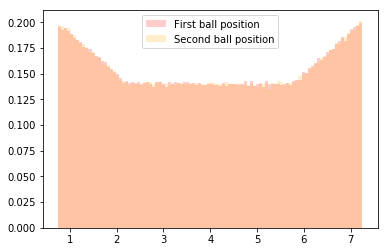

In [33]:
L, sigma = 8, 0.75
H = np.array([directSampling(L, sigma) for i in range(10**6)])
plt.hist(H[:, 0], bins = 100, normed = 1, color = 'red', label = 'First ball position', alpha = 0.2)
plt.hist(H[:, 1], bins = 100, normed = 1, color = 'orange', label = 'Second ball position', alpha = 0.2)
plt.legend()
plt.show()

This histogram shows the distribution of the two balls, and more especially the depletion effect on the border sides.

In [4]:
def wrongSampling(L, sigma) :
    """Wrong sampling of 2 1D-balls of size 2*sigma, on a 1D-line of length L."""
    n = 2
    pos = np.zeros(n)
    pos[0] = sigma + random()*(L-2*sigma)
    acc = False
    while acc == False : # while overlap, try again
        # Choose the position of a ball between [sigma, L-sigma]
        pos[1] = sigma + random()*(L-2*sigma)
        if abs(pos[1] - pos[0]) >= 2*sigma : # if no overlap, keep and stop
            acc = True
    return pos

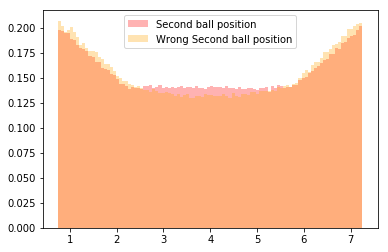

In [34]:
L, sigma = 8, 0.75
W = np.array([wrongSampling(L, sigma) for i in range(10**6)])
plt.hist(H[:, 1], bins = 100, normed = 1, color = 'red', label = 'Second ball position', alpha = 0.3)
plt.hist(W[:, 1], bins = 100, normed = 1, color = 'orange', label = 'Wrong Second ball position', alpha = 0.3)
plt.legend()
plt.show()

In [16]:
def naiveSampling(n, L, sigma) :
    reject = 0
    acc = False
    while acc != True :
        pos = random(size = n)*(L-sigma) + sigma
        x, y = np.ones((n, n))*pos, np.transpose(np.ones((n, n))*pos)
        z =  np.abs(x - y) >= 2*sigma
        np.fill_diagonal(z, True)
        if np.sum(z) == n*n :
            acc = True
        else :
            reject += 1
    return pos, reject

Here, we implemented a modified version of the given naive algorithm. Instead of comparing every step, and stop if two spheres overlap, which is very long with for loops in Python, we generate an array of positions of the spheres :
$$p = [x_{1}, ..., x_{n}]$$
then a matrix such that
$$\begin{array}{cccc}
|x_{1} - x_{1}| & |x_{1} - x_{2}| & ... & |x_{1} - x_{n}| \\
|x_{2} - x_{1}| & |x_{2} - x_{2}| & ... & |x_{2} - x_{n}| \\
\vdot & & \ddot & \vdot \\
|x_{n} - x_{1}| & |x_{n} - x_{2}| & ... & |x_{n} - x_{n}|
\end{array}$$


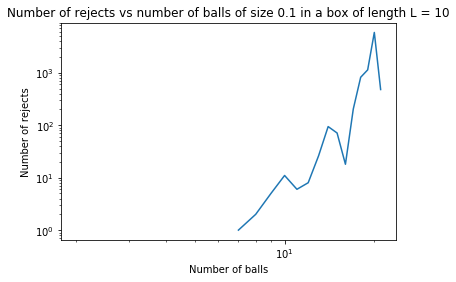

In [30]:
seed(1)
L, sigma = 10, 0.1
N = 22
dat = np.zeros(N-2)
for i in range(2, N):
    a, dat[i-2] = naiveSampling(i, L, sigma)

plt.loglog(range(2, N), dat)
plt.xlabel('Number of balls')
plt.ylabel('Number of rejects')
plt.title('Number of rejects vs number of balls of size ' + str(sigma) + 
          ' in a box of length L = ' + str(L))
plt.show()

In the last graph, we can sometimes observe a decrease of the number of rejects, which are "lucky" configurations that converged fastly. However, the number of rejects exponentially increases.

In [7]:
def stupidNaiveSampling(n, L, sigma) :
    reject, acc = 0, False
    while acc != True :
        pos = np.zeros(n)
        for k in range(n) :
            pos[k] = random()*(L-sigma) + sigma
            for l in range(k-1) :
                if abs(pos[k] - pos[l]) > 2*sigma :
                    break
    return pos, reject

In [8]:
def cleverSampling(n, L, sigma):
    pos = random(size = n)*(L-2*n*sigma)
    pos = np.sort(pos)
    for k in range(n):
        pos[k] += sigma*(2*k-1)
    return pos

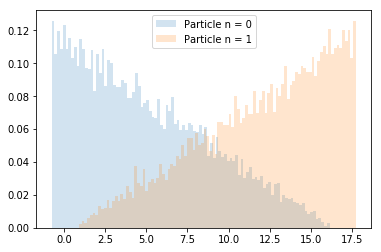

In [37]:
N, n, L, sigma = 10**4, 2, 20, 0.75
dat= np.zeros((N, n))
for k in range(N):
    dat[k] = cleverSampling(n, L, sigma)

for l in range(n):
    plt.hist(dat[:,l], bins = 100, normed = True, alpha = 0.2, label = 'Particle n = ' + str(l))

plt.legend() ; plt.show()

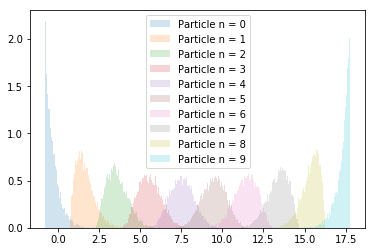

In [42]:
N, n, L, sigma = 10**4, 10, 20, 0.75
dat= np.zeros((N, n))
for k in range(N):
    dat[k] = cleverSampling(n, L, sigma)

a = [0 for i in range(n)]

for l in range(n):
    a[l], bins, normed = plt.hist(dat[:,l], 100, normed = True, alpha = 0.2, label = 'Particle n = ' + str(l))

plt.legend() ; plt.show()

In the two graphs above, we actually obtain the same result than before, but it is hidden. Indeed, just before the mapping step, we sort the list of the positions to get an ordered list. But in the first case, where we accept or reject a distribution of positions, the two particles were indistinguishable, which is not the case here. However, to 

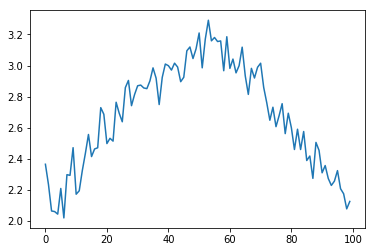

In [49]:
b = np.sum(np.array(a), axis=0)
plt.plot(b) ; plt.show()